In [1]:
import numpy as np
import matplotlib.pyplot as plt

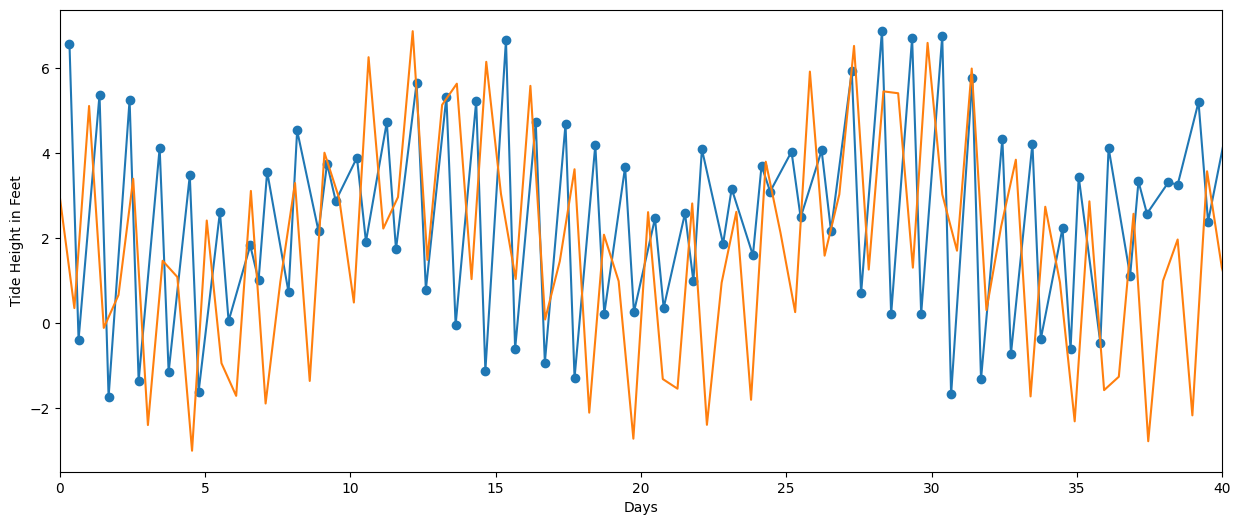

In [2]:
#input the days that each height was recorded on
#separated the hours and the minutes as to calculate both in terms of days
x = np.array([1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,11,11,12,12,13,13,14,14,15,15,16,16,17,17,18,18,19,19,20,20,21,21,22,22,23,23,24,24,25,25,26,26,27,27,28,28,29,29,30,30,31,31,32,32,33,33,34,34,35,35,36,36,37,37,38,38,39,39,40,40,41,41])
h = np.array([8,15,8,16,9,17,10,18,11,18,12,19,13,20,3,21,4,21,4,11,5,12,6,13,6,14,7,15,7,15,8,16,9,16,9,17,10,17,10,18,11,18,12,19,2,19,2,20,3,10,4,11,5,12,6,13,7,14,7,15,8,16,9,16,10,17,11,18,12,18,1,19,2,20,2,9,3,11,4,12,5,13])
m = np.array([7,37,55,25,45,14,35,0,28,46,22,31,24,16,22,1,7,46,50,58,31,56,8,45,47,25,22,0,59,34,34,8,10,41,45,12,21,45,57,15,38,48,25,20,22,52,58,30,37,44,23,55,15,57,9,50,5,39,58,27,50,10,40,52,30,34,19,12,10,49,32,24,13,0,54,54,39,15,29,22,21,14])
y = np.array([6.57,-0.39,5.38,-1.74,5.26,-1.36,4.13,-1.15,3.48,-1.61,2.62,0.05,1.83,1.01,3.57,0.73,4.54,2.17,3.76,2.88,3.90,1.92,4.73,1.74,5.66,0.79,5.33,-0.04,5.23,-1.12,6.67,-0.61,4.74,-0.93,4.69,-1.29,4.20,0.22,3.68,0.26,2.47,0.36,2.59,0.99,4.10,1.87,3.17,1.60,3.71,3.10,4.04,2.49,4.07,2.18,5.93,0.70,6.89,0.21,6.72,0.22,6.77,-1.68,5.77,-1.32,4.35,-0.73,4.23,-0.38,2.24,-0.61,3.45,-0.46,4.13,1.12,3.34,2.58,3.32,3.26,5.21,2.39,4.83,2.41])

hours = h+(m/60)         #divide minutes by 60 (minutes) to calculate the portion of the hour it equals to. add to whole hrs
days = (hours/24)+(x-1)  #divide the hours (and minute portions in terms of hrs) by 24 (hrs) to get the numerical portion of the day
                         # add to the day that the times were recorded on minus 1 because the first day is the initial start of time, so start time would be 0

z= np.linspace(0,41,82)#value for approximation


plt.figure(figsize= (15,6))
plt.xlabel('Days')
plt.ylabel('Tide Height in Feet')
plt.scatter(days,y)
plt.plot(days,y)
plt.xlim([0,40])
sin = np.sin
pi = np.pi

#guesses at oscillartory functions
plt.plot(z,3*sin(2.5*pi*z)+2+2*sin(-0.4*z)+np.cos(-0.4*z))

In [3]:
plt.style.use("./astr19_matplotlib_defaults.txt")

28.755304259159807 0.9999716975947933 1.2588810128384702 0.9329116368884687


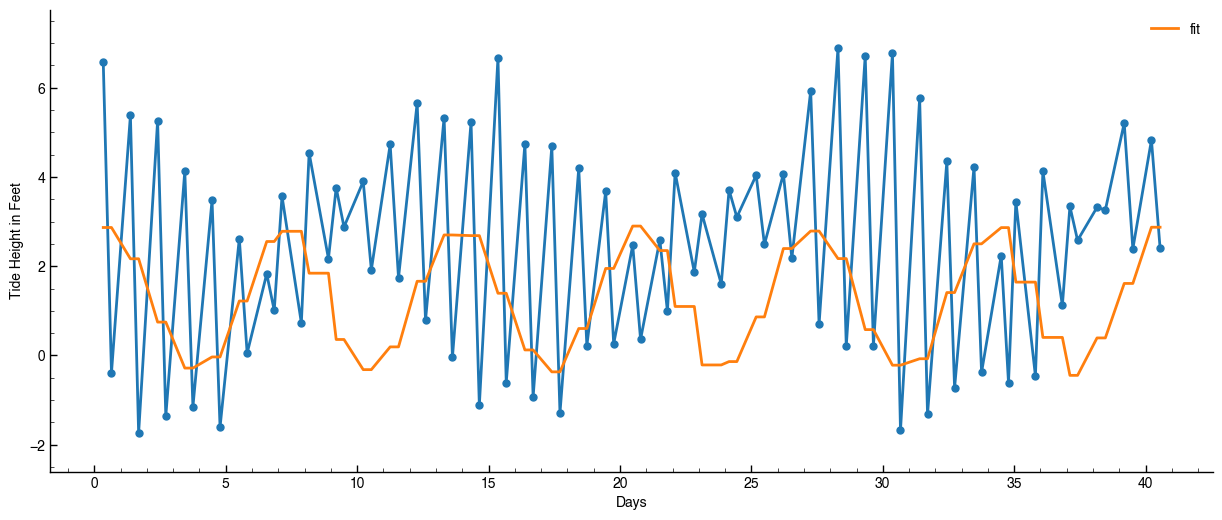

In [24]:
from scipy import optimize
npoints=82
sin = np.sin
pi = np.pi
a=3
b=2.5
c=2
d=-0.4
f=(a*sin(b*pi*x)+c+c*sin(d*x)+np.cos(d*x))
sig=0.25
f_err=np.full(82,sig)
#define the function to fit
def f_line(x, a, b, c, d):
    return (a*sin(b*pi*x)+c+c*sin(d*x)+np.cos(d*x))
params, params_cov=optimize.curve_fit(f_line,x,f,sigma=f_err,p0=None)
a_fit=params[0]
b_fit=params[1]
c_fit=params[2]
d_fit=params[3]

print(a_fit, b_fit, c_fit, d_fit)
f_fit=a_fit*sin(b_fit*pi*x)+c_fit+c_fit*sin(d_fit*x)+np.cos(d_fit*x)

#plt.figure(y,f_fit)
#plt.plot(days,y)
#plt.xlim(0,40)

f=plt.figure(figsize=(15,6))
plt.plot(days,y)
plt.scatter(days,y)
plt.plot(days,f_fit,label='fit')
plt.xlabel('Days')
plt.ylabel('Tide Height in Feet')
plt.legend(loc=0,frameon=False)

<ErrorbarContainer object of 3 artists>

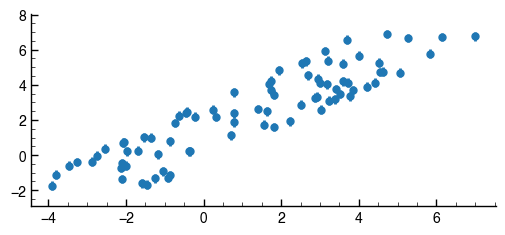

In [57]:
#create idx_model and sets it equal to the days vallues sorted in order
idx_model = np.argsort(days)

#Set y_data to the y vallue that corresponds with the days vallues
y_data = y[idx_model]

#subtracts the y_data form the f_fit fontion that is the best fit model
sub_fit = y_data - f_fit

#plots the data points left after best fit is subtracted off
plt.errorbar(sub_fit,y,sig,fmt='o')

In [6]:
#Calculates the mean of the residuals and then prints out the result
sub_fit_mean = np.mean(sub_fit)
print(f'The mean of the tidal data after best fit is subtracted off is {sub_fit_mean}.')

#Calculates the standard deviation of the residuals and then prints out the result
sub_fit_std = np.std(sub_fit)
print(f'The standard deviation of the tidal data after best fit is subtracted off is {sub_fit_std}.')


The mean of the tidal data after best fit is subtracted off is 1.1936111378931267.
The standard deviation of the tidal data after best fit is subtracted off is 2.6649519710417113.


In [7]:
def gaussian(x,mu,s):
    return 1./(2.*np.pi*s**2)**0.5 * np.exp(-0.5*((x-mu)/s)**2)

(-5.0, 8.0)

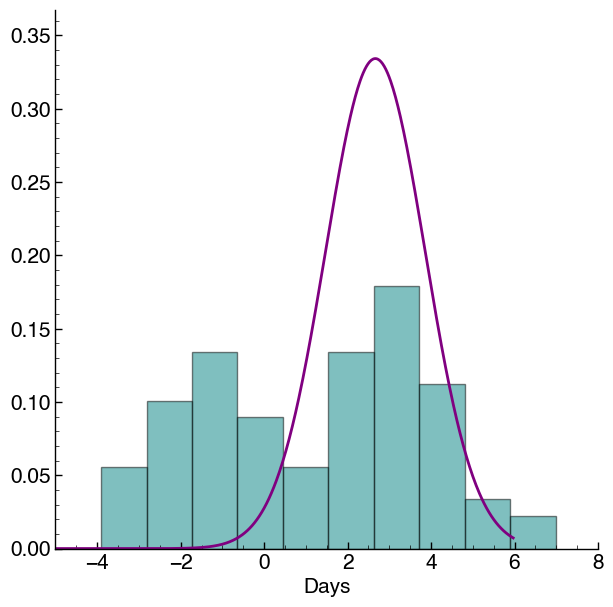

In [8]:
#set the font on the graph to times new roman
#plt.rcParams['font.family'] = ['times new roman']

#creates the plot
f,ax = plt.subplots(1,1, figsize=(7,7))

#changes the font size of the tick marks
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(15)
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(15)

days_g = np.linspace(-5*sub_fit_std,5*sub_fit_mean,1000)

ax.plot(days_g,gaussian(days_g,sub_fit_std,sub_fit_mean), color='purple')

#creates the histagram of the residual
ax.hist(sub_fit, bins=10, edgecolor='black', alpha=0.5, color='teal', density=True)
ax.set_xlabel('Days', fontsize=15)
ax.set_xlim(-5.0,8)

In [9]:
x_model = np.sort(x)
y_model = y[x_model]

In [14]:
idx_model = np.argsort(x)
y_data = y[idx_model]
y_model = y[x[idx_model]]

residuals = y_data - y_model

In [75]:
#adding the outlier to the data
xmin=0.0
xmax=10.0

x_out = 14 #day for the outlier
y_out = 7.33 #height of the outlier
y_err = np.full(npoints,sig,dtype=np.float32)
x_new = np.append(x,x_out)
y_new = np.append(y,y_out)
y_err_new = np.append(y_err,sig)

In [16]:
#model including the new data location
idx_model = np.argsort(x_new)
y_data_new = y_new[idx_model]
y_model_new = y[x_new[idx_model]]

residuals_new = y_data_new - y_model_new

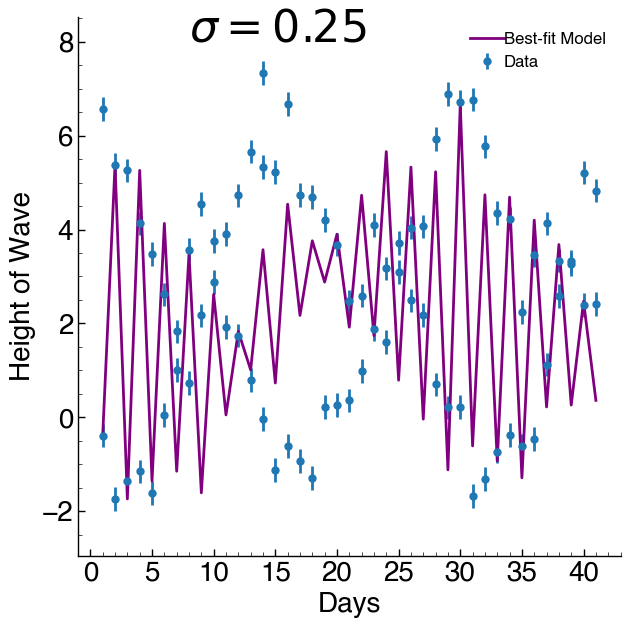

In [94]:
# plot data including outlier
f,ax = plt.subplots(1,1, figsize=(7,7))
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(20)
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(20)

ax.errorbar(x_new,y_new,y_err_new,fmt='o',label='Data')
ax.plot(x_model,y_model,color='purple',label='Best-fit Model')
#ax.set_xlim([-0.1,10.1])
#ax.set_ylim([-2,3])
ax.text(8,8,r'$\sigma = 0.25$', color='black', fontsize=32)
ax.set_xlabel('Days',fontsize=20)
ax.set_ylabel('Height of Wave', fontsize=20)
plt.legend(frameon=False,loc='upper right',fontsize=12,handletextpad=0)

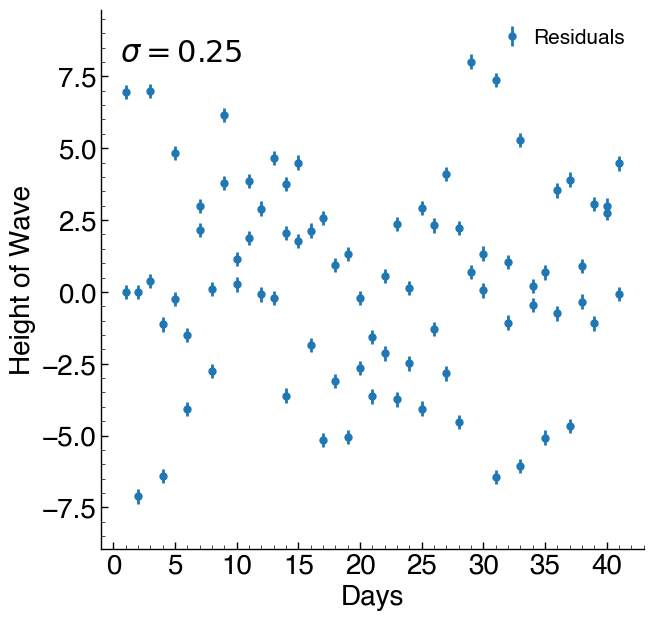

In [113]:
#plotting the residuals including the outlier
f,ax = plt.subplots(1,1,figsize=(7,7))
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(20)

for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(20)

ax.errorbar(x_new,residuals_new,y_err_new,fmt='o',label='Residuals')
#ax.set_xlim([-0.1,41])
#ax.set_ylim([-2,10])
ax.text(0.5,8,r'$\sigma = 0.25$', color='black',fontsize=22)
ax.set_xlabel('Days',fontsize=20)
ax.set_ylabel('Height of Wave',fontsize=20)
plt.legend(frameon=False,loc='upper right',fontsize=15,handletextpad=0)

In [ ]:
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

In [ ]:
def gaussian(x,mu,s):
    return 1./(2.*np.pi*s**2)**0.5 * np.exp(-0.5*((x-mu)/s)**2)

Text(0, 0.5, 'Height of Waves')

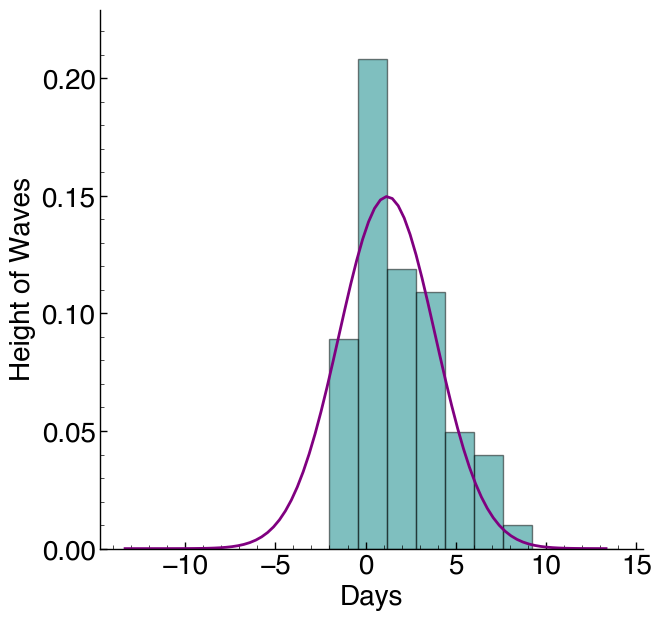

In [125]:
#histogram with the outlier
f,ax = plt.subplots(1,1,figsize=(7,7))
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(20)

for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(20)

#plotting the histogram
ax.hist(residuals_new,bins=10,range=(-2,14),alpha=0.5,edgecolor='black',color='teal',density=True)

days_g = np.linspace(-5*sub_fit_std,5*sub_fit_std,82)
ax.plot(days_g,gaussian(days_g,sub_fit_mean,sub_fit_std),color='purple')
#ax.set_xlim([-1,10])
ax.set_xlabel('Days',fontsize=20)
ax.set_ylabel('Height of Waves',fontsize=20)